#편향 #예측값과 정답간의 관계(잔차)
#분산 #예측값끼리의 관계
#모델.score => R2값
#메트릭스 => 
#과대적합(Overfitting)
#데이터가 너무 많아서, 모델 지나치게 복잡
#너무많은학습
#최적적합
#다양성을갖춘데이터
#양질의많은데이터
#규제를(Regulartization)통한 모델 복잡도 적정수준 설정 (릿지, 랏소)

---
#모델복잡도
#특성파라미터
#하이퍼파라미터 개수 => 영향을 받는 애들이 많다
#입력데이터셋
#학습반복횟수
#앙상블모델갯수
#모델차수
#Low bias / High Variance


#오캄의면도달
#같은현상을 설명하는 두 개의 주장이 있다면 간단한 쪽을 선택해라
#모델 자체가 복잡 -> 덜 복잡한 모델 사용
#데이터 부족 => 등등등 

RSS 최소가 되도록하는 것 (Cost/Loss Function)
#최적화
손실함수값이 최소화 될 수 있도록 optimize
=>경사하강법


Leaning Rate => 학습속도
오버슈팅 : 학습속도가 너큰 경우
#스몰 러닝 레이터 -> 학습 속도가 너무 낮아서 금방 끝나는 경우

In [ ]:
# 특성공학 => 차원축소
#특싱생성 => 파생변수? 

In [31]:
import pandas as pd

FILE = r'C:\Users\seo\Downloads\student_info.csv'
df = pd.read_csv(FILE)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         90 non-null     int64 
 1   gender     90 non-null     object
 2   weight_kg  90 non-null     int64 
 3   height_cm  90 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ KB


In [ ]:
#분류모델 종류 KNN NB SVM Decision Tree #Random Forest => +classifier / regressor
#k최근접 모델
# KNN 방식
# p에 따라서 맨하탄방식, 유클리드 거리에 따라서 잰다 . 
# predict_proba(X)

---
## 분류 ---------------------------
- 가장 간단한 머신러닝 분류 학습 알고리즘
- 모델 관련 패턴 식이 없음 -> 데이터마다 거리 계산을 한다. y = ax+b 이런 식이 없다
- 하이퍼파라미터 -> k 최근접 이웃 데이터 수
- 적용 학습 -> 회귀, 분류 모두 가능

In [17]:
X = [[0], [1], [2], [3],[4]]
y = [0, 0, 1, 1,1]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [18]:
Knn = KNeighborsClassifier() # k=5가 기본값

In [19]:
Knn.fit(X,y)

KNeighborsClassifier()

In [20]:
Knn.classes_

array([0, 1])

In [11]:
Knn.n_neighbors

5

In [21]:
Knn.predict(X)

array([1, 1, 1, 1, 1])

In [22]:
Knn.predict([[2.1]])

array([1])

In [23]:
Knn.predict_proba([[2.1]])

array([[0.4, 0.6]])

In [24]:
y_pre = Knn.predict(X)

In [25]:
Knn.score(X,y)

0.6

In [26]:
#최적의 K를 찾아보자
#k가 1~ 5일때까지
for _k in range(1,6):
    Knn.n_neighbors = _k
    Knn.fit(X,y)
    # Knn.predict()
    print(f'{_k} : {Knn.score(X,y)}')

1 : 1.0
2 : 0.8
3 : 1.0
4 : 0.8
5 : 0.6


In [27]:
# knn 실습
df.head()

,no,gender,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170


In [30]:
#범주형 칼럼 추가 => 크다 
#남자 여자.
def howTall(tail):
    n = ""
    if tail >= 180:
        n = "tail"
    elif tail >= 170:
        n = 'normal'
    else :
        n = 'short'
    
    return n

df['how'] = df['height_cm'].apply(howTall)
df.head()

#

,no,gender,weight_kg,height_cm,how
0,1,m,98,198,tail
1,2,m,77,170,normal
2,3,m,70,170,normal
3,4,m,90,198,tail
4,5,m,71,170,normal


In [36]:
# 몸무게 / 신장 * 신장
def bmi(weight,tail):
        
    # n = ""
    # if tail >= 180:
    #     n = "tail"
    # elif tail >= 170:
    #     n = 'normal'
    # else :
    #     n = 'short'
    
    return weight * tail


df['how'] = df.loc[:,['weight_kg','height_cm']].apply(bmi())

TypeError: bmi() missing 1 required positional argument: 'tail'

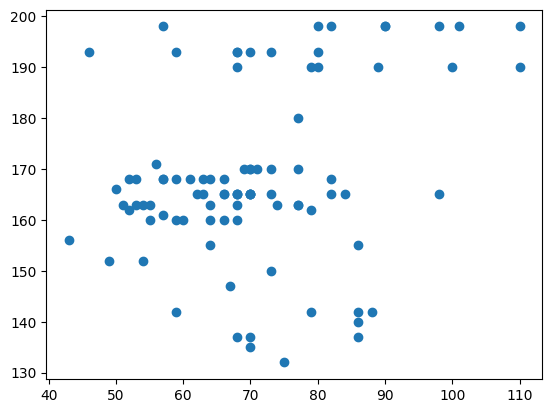

In [40]:
plt.scatter(df.weight_kg,df.height_cm)

In [41]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

import pandas as pd 
import matplotlib.pyplot as plt


---
#데이터 분석 & 목적
- 데이터 구성 -> 방법 ? 지도 / 비지도 => 데이터를 살펴본다.
- 데이터/피쳐/특성/변수/속성/독립변수/관측값 = > 타겟/라벨/클래스/종족변수/반응변수
- 수치형 => 회귀 / 범주형 -> 분류
- 학습방법 => 해당하는 학습 방법 => all_estimator()

---
1. 데이터 준비
    - 데이터 로링 & 기본 데이터 확인
2. 데이터 전처리
    -데이터 정제 : 결측치,중복값,이상치,모순값   
    -데이터 표준화 : 단위, 자료형  
    -데이터 정규화 : 수치값 => 값의 범위 , 
    - 통일 ---> 스케일러 minmaxScalar/  RousScalar / 범주형/글자 => OrdinalEncoder, OneHotEncoder(순서가 중요하지 않다), LabelEncoder(타겟을 잡았는데, 그게 범주형? Y)   
    - 데이터 변경: 특성 추가 / 생성
3. 학습용 데이터 준비 => 학습용, 테스트용, 검증용 -----
    - 데이터 추가
    - 분류 => 항목 비율, 데이터 추가 --> 업샘플링, 다운샘플링 
    - API에 매개변수에 비율조정한 매개변수 있는지 체크해보자. train_test_(매개변수안에 있는 걸 가지고, 매개변수를 조정해서, 특정 컬럼만 받기)
    - 나중에는 교차검증
4. 학습 모델 객체 생성
5. 예측 및 평가
    - 검증 데이터 => 예측&평가
    -
6. 

In [43]:
FILE = r'C:\Users\seo\Downloads\student_info.csv'
stdDF = pd.read_csv(FILE, usecols=[2,3]) #헤드는 포함한다. #원하는 컬럼만 가져온다.

In [44]:
stdDF.head(3)

,weight_kg,height_cm
0,98,198
1,77,170
2,70,170


In [45]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   weight_kg  90 non-null     int64
 1   height_cm  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [46]:
stdDF.isnull().sum()

weight_kg    0
height_cm    0
dtype: int64

In [49]:
# 새로운 속성
# BMI 특성 추가
bmi_Value = round(stdDF.weight_kg/((stdDF.height_cm /100)*(stdDF.height_cm /100)),1)
bmi_Value

0     25.0
1     26.6
2     24.2
3     23.0
4     24.6
      ... 
85    27.7
86    20.3
87    22.0
88    25.8
89    30.5
Length: 90, dtype: float64

In [57]:
#18.5 ~ 23.0 ~ 25.0 ~ 30.0 => L , N , O , B , H
_bins = [0,18.5,23.0,25.0,30.0,max(bmi_Value)]
bmi_level = pd.cut(bmi_Value,bins=_bins,labels=[0,1,2,3,4])




In [91]:
bmi_level.value_counts()

2    54
1    28
0     8
dtype: int64

In [92]:
stdDF,bmi_level #데이터 #타겟
stdDF['bmi_level'] = bmi_level

In [62]:
stdDF.head()

,weight_kg,height_cm,bmi_level
0,98,198,2
1,77,170,3
2,70,170,2
3,90,198,1
4,71,170,2


weight_kg  height_cm  bmi_level
70         165        2            4
68         165        2            3
           193        0            2
70         170        2            2
90         198        1            2
                                  ..
63         168        1            1
           165        2            1
62         165        1            1
61         168        1            1
110        198        2            1
Length: 79, dtype: int64

In [104]:
# 특성 데이터의 범위 확인
stdDF.describe().T[['min','max']] #전치시켜서, min하고 max만 가져오기 

,min,max
weight_kg,43.0,110.0
height_cm,132.0,198.0


In [105]:
stdDF.describe().T['min']-stdDF.describe().T['max']

weight_kg   -67.0
height_cm   -66.0
dtype: float64

In [93]:
from sklearn.preprocessing import StandardScaler
#별차기 없는것 같아도,내가 두 수의 기준을 만들고싶다면
#수치형 특성 데이터 스케일링
st = StandardScaler()
st_data = st.fit_transform(stdDF[stdDF.columns[:-1]])
st_data

array([[ 1.99325723,  1.75590438],
       [ 0.4748146 ,  0.10974402],
       [-0.03133294,  0.10974402],
       [ 1.4148029 ,  1.75590438],
       [ 0.04097385,  0.10974402],
       [-0.03133294, -0.18421318],
       [ 0.18558743,  1.46194717],
       [-0.82670766, -1.53641633],
       [-0.17594653, -1.83037354],
       [ 1.12557573, -0.7721276 ],
       [ 0.98096215, -0.18421318],
       [-0.24825332, -1.24245913],
       [-0.03133294,  0.10974402],
       [ 1.12557573, -1.65399922],
       [-0.03133294, -0.18421318],
       [ 0.33020102, -2.12433075],
       [-0.03133294, -1.83037354],
       [-0.17594653, -0.18421318],
       [-0.17594653, -0.18421318],
       [ 0.4748146 ,  0.69765844],
       [-0.4651737 , -0.00783886],
       [ 1.12557573, -1.53641633],
       [-0.03133294,  1.46194717],
       [ 0.83634856, -0.18421318],
       [ 1.27018931, -1.53641633],
       [ 1.99325723, -0.18421318],
       [ 1.12557573, -1.83037354],
       [-0.53748049, -0.18421318],
       [-0.17594653,

In [98]:
mmt = MinMaxScaler()
mmt_data = mmt.fit_transform(stdDF[stdDF.columns[:-1]])
mmt_data

array([[0.82089552, 1.        ],
       [0.50746269, 0.57575758],
       [0.40298507, 0.57575758],
       [0.70149254, 1.        ],
       [0.41791045, 0.57575758],
       [0.40298507, 0.5       ],
       [0.44776119, 0.92424242],
       [0.23880597, 0.15151515],
       [0.37313433, 0.07575758],
       [0.64179104, 0.34848485],
       [0.6119403 , 0.5       ],
       [0.35820896, 0.22727273],
       [0.40298507, 0.57575758],
       [0.64179104, 0.12121212],
       [0.40298507, 0.5       ],
       [0.47761194, 0.        ],
       [0.40298507, 0.07575758],
       [0.37313433, 0.5       ],
       [0.37313433, 0.5       ],
       [0.50746269, 0.72727273],
       [0.31343284, 0.54545455],
       [0.64179104, 0.15151515],
       [0.40298507, 0.92424242],
       [0.58208955, 0.5       ],
       [0.67164179, 0.15151515],
       [0.82089552, 0.5       ],
       [0.64179104, 0.07575758],
       [0.29850746, 0.5       ],
       [0.37313433, 0.42424242],
       [0.34328358, 0.42424242],
       [0.

In [99]:
data = stdDF[stdDF.columns[:-1]]
target = stdDF[stdDF.columns[-1]]

In [76]:
data.shape, target.shape

((90, 2), (90,))

In [96]:
#타겟의 분류 데이터의 비율이 고르지 않음 => 비율에 맞도록 데이터를 분리
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state=11,stratify=target,test_size=0.2)
#stratify=target 타겟을 보아하니, 별로 비율이 안 맞더라, 그러니까 타겟에 좀 맞춰줘!


In [80]:
len(x_train), y_train.value_counts()

(72,
 1    22
 3    15
 2    14
 4    14
 0     7
 Name: bmi_level, dtype: int64)

In [85]:
#분류 KNN 모델 객체 생성 k = 5 기본값
knnModel = KNeighborsClassifier(n_neighbors=2)
knnModel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [86]:
knnModel.score(x_train,y_train)
#일일히 반복문 돌려서, 매개변구값만 바꾸서 알아보자

0.8611111111111112

In [88]:
scores = []
for n in range(1,x_train.shape[0]):
    knnModel.n_neighbors = n
    knnModel.fit(x_train,y_train)
    sc = knnModel.score(x_train,y_train)
    scores.append(sc)

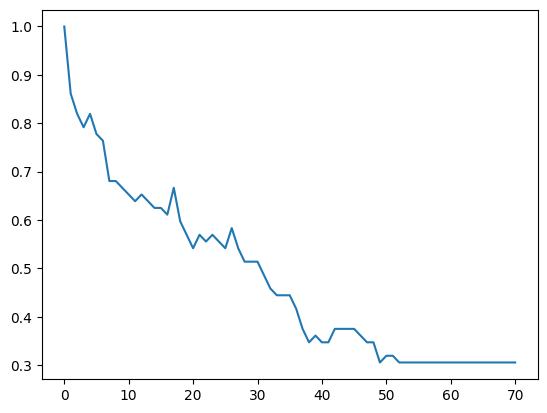

In [89]:
plt.plot(scores)

In [90]:
#분류의 값을 5개를 잡아보자!

_bins = [0,18.5,23.0,max(bmi_Value)]
bmi_level = pd.cut(bmi_Value,bins=_bins,labels=[0,1,2]) #너무 많은것 같아서
 

1 : score: 1.0
2 : score: 0.8611111111111112
3 : score: 0.8194444444444444
4 : score: 0.7916666666666666
5 : score: 0.8194444444444444
6 : score: 0.7777777777777778
7 : score: 0.7638888888888888
8 : score: 0.6805555555555556
9 : score: 0.6805555555555556
10 : score: 0.6666666666666666
11 : score: 0.6527777777777778
12 : score: 0.6388888888888888
13 : score: 0.6527777777777778
14 : score: 0.6388888888888888
15 : score: 0.625
16 : score: 0.625
17 : score: 0.6111111111111112
18 : score: 0.6666666666666666
19 : score: 0.5972222222222222
20 : score: 0.5694444444444444
21 : score: 0.5416666666666666
22 : score: 0.5694444444444444
23 : score: 0.5555555555555556
24 : score: 0.5694444444444444
25 : score: 0.5555555555555556
26 : score: 0.5416666666666666
27 : score: 0.5833333333333334
28 : score: 0.5416666666666666
29 : score: 0.5138888888888888
30 : score: 0.5138888888888888
31 : score: 0.5138888888888888
32 : score: 0.4861111111111111
33 : score: 0.4583333333333333
34 : score: 0.4444444444444

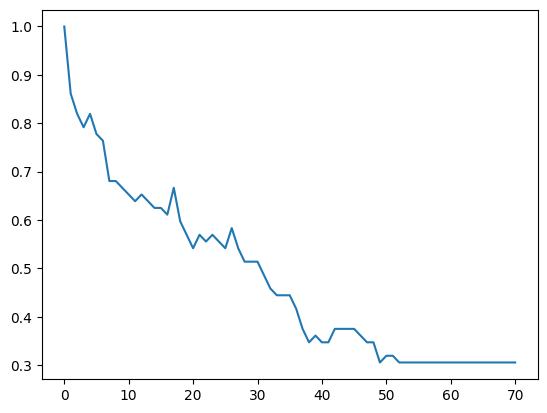

In [101]:
scores = []
for n in range(1,x_train.shape[0]):
    knnModel.n_neighbors = n
    knnModel.fit(x_train,y_train)
    sc = knnModel.score(x_train,y_train)
    print(f'{n} : score: {sc}')
    scores.append(sc)

plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')


In [107]:
# 최적의 파라미터를 하나 찾아보자
# 결정된 파라미터 2 or 7
y_pre = knnModel.predict(x_test)
#모델의 score 아니면 메트릭스의 score 를 사용해서
accuracy_score(y_test,y_pre)

0.3333333333333333

In [108]:
knnModel.score(x_test,y_test)

0.3333333333333333

In [109]:
#마음에 안드느니까 gridSercch를 사용해보자!
from sklearn.model_selection import GridSearchCV

In [116]:
# GridSearchCV()
#하이퍼파라미터 => n_neighbors / 거리재는거 유클리드 거리를 바꿔보자 

model = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5],'p':[1,2]} #이렇게만 해도 8개의 모델이 만들어진다.
grid = GridSearchCV(model,param_grid=params,cv=3,scoring='accuracy')
#cv가 뭐였더라?

In [117]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2]},
             scoring='accuracy')

In [118]:
grid.cv_results_

{'mean_fit_time': array([0.00432134, 0.00531586, 0.00598534, 0.00365869, 0.0026567 ,
        0.0056568 , 0.00266361, 0.00265797]),
 'std_fit_time': array([0.00094072, 0.00169507, 0.00431146, 0.00169477, 0.00046817,
        0.00170242, 0.00047308, 0.00093796]),
 'mean_score_time': array([0.00465465, 0.00398676, 0.00958363, 0.00565227, 0.00365663,
        0.00498144, 0.00565227, 0.0053192 ]),
 'std_score_time': array([0.00124426, 0.00081848, 0.00471074, 0.00188486, 0.00124394,
        0.00081471, 0.00124646, 0.00339004]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2, 'p': 1},
  {'n_neighbors': 2, 'p': 2},
  {'n_neighbors': 3, 'p'

In [119]:
grid.best_params_

{'n_neighbors': 2, 'p': 2}

In [ ]:
#최적의 모델을 받겠다
model = grid.best_estimator_ #내가 받은 최적의 모델이다.


In [120]:
grid.best_score_

0.736111111111111

In [ ]:
#그런데 우리는 지금까지 스케일링을 하지 않은 애들이다.
#위에서 스케일링을 하는 애들을 넣어서 해보자!
#폴더를 다운 받아서 올려줄께/ gridSerch에서 cv뭐더라...

---
# 회귀
# 키에 따른 몸무게 예측

In [122]:
# KNeiborsRegressor 학습 알고리즘 사용
# 데이터 : student_info.csv
# 목적 : 키에 따른 몸무게를 예측하는 예측기

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt


In [149]:

FILE = r'C:\Users\seo\Downloads\student_info.csv'
stdDF = pd.read_csv(FILE,usecols=[1,2,3])

In [150]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     90 non-null     object
 1   weight_kg  90 non-null     int64 
 2   height_cm  90 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


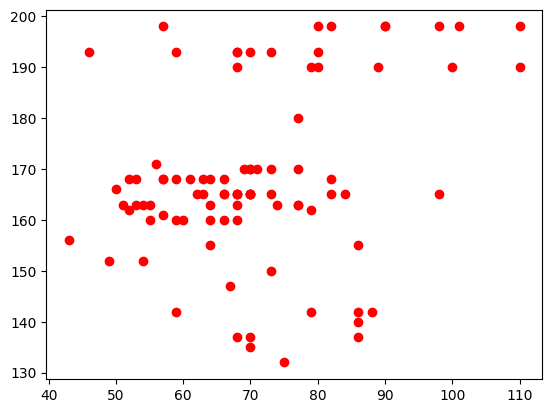

In [131]:
plt.plot(stdDF.weight_kg,stdDF.height_cm,'ro')

In [151]:
stdDF.corr()

C:\Users\seo\AppData\Local\Temp\ipykernel_33240\4240857658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdDF.corr()


,weight_kg,height_cm
weight_kg,1.000000,0.276307
height_cm,0.276307,1.000000


In [152]:
n_data = stdDF[stdDF.gender == 'm']
n_data.head()

,gender,weight_kg,height_cm
0,m,98,198
1,m,77,170
2,m,70,170
3,m,90,198
4,m,71,170


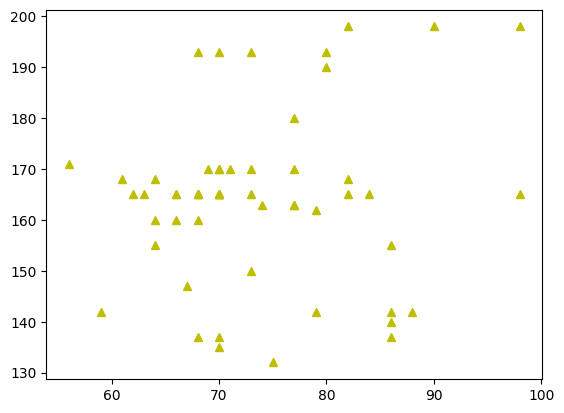

In [148]:
plt.plot(n_data.weight_kg,n_data.height_cm,'y^')

In [153]:
n_data.corr()

C:\Users\seo\AppData\Local\Temp\ipykernel_33240\287311477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  n_data.corr()


,weight_kg,height_cm
weight_kg,1.000000,0.116982
height_cm,0.116982,1.000000


In [154]:
w_data = stdDF[stdDF.gender == 'f']
w_data.corr()

C:\Users\seo\AppData\Local\Temp\ipykernel_33240\506462086.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  w_data.corr()


,weight_kg,height_cm
weight_kg,1.000000,0.684917
height_cm,0.684917,1.000000


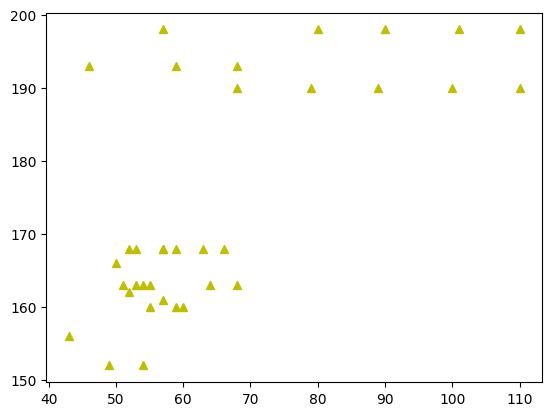

In [147]:
plt.plot(w_data.weight_kg,w_data.height_cm,'y^')

In [155]:
model = KNeighborsRegressor()

In [ ]:
#카애 따룬 쥬뵨의 애들이 구금하담녀?
model.kneighbors